# Zipf's Law

### import

In [73]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from collections import Counter
import re
from collections import Counter
from pathlib import Path
import os

In [75]:
def calculate_zipfs_law(words):

    # Count word frequencies
    word_counts = Counter(words)
    
    # Sort words by frequency in descending order
    ranked_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    print(type(ranked_words))
    ranks = np.arange(1, len(ranked_words)+1)
    frequencies = [count for word, count in ranked_words]

    #ranks = np.arange(1, len(sorted_word_counts) + 1)
    #frequencies = list(sorted_word_counts.values())
    
    return ranks, frequencies

In [80]:
def plot_zipfs_law(ranks, frequencies, word_list):
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='.', linestyle='-', color='blue')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law Plot')
    plt.grid(True)
    
    #alpha, C = estimate_zipf(word_list)
    #sum_of_frequencies = 998186
    #plt.loglog(rank, (sum_of_frequencies / C * rank ** alpha),marker='.', linestyle='-', color='red')
    
    
    plt.show()

### get current directory

In [83]:
print (f"current directory: {os.getcwd()}")
file_list=os.listdir(os.getcwd())
print (file_list)

current directory: /Users/wayne.mitchell/Documents/NU/proj_4_working
['.DS_Store', 'wpm_project_4.1.ipynb', 'Untitled.ipynb', 'Resources', '.ipynb_checkpoints', 'sandbox.ipynb', '.git']


In [84]:
#new_path = "./NU/proj_4_working/"
#new_path = "../.."
#os.chdir(new_path)
#print (f"current directory: {os.getcwd()}")

### read in lyrics

In [88]:
file_path = Path("./Resources/Input_data/lyricsdf.csv")
lyrics_df = pd.read_csv(file_path)
lyrics_df.head()
lyrics_list = lyrics_df['lyrics']

### parse lyrics into a word list

In [90]:
pattern = r"[\'\(\)\[\]\{\}]"
pattern_2 = r","
#pattern_3 = r" "
word_list = []
word_dict = {}

for line in lyrics_list:
    if isinstance(line, str):
        line = line.lower()
        line = re.sub(pattern,"",line)
        line = re.sub(pattern_2,"",line)
        #line = re.sub(pattern_3,"",line)
        tmp_list = line.split()
        for word in tmp_list:
            if isinstance(word, str):
                word_list.append(word)
                if word in word_dict:
                   word_dict[word]+=1
                else:
                    word_dict[word]=1


### get length of word_list

In [94]:
print(len(word_list))

998186


### calculate ranks abd frequencies

In [96]:
ranks, frequencies = calculate_zipfs_law(word_list)
print(f"length ranks: {len(ranks)}")
print(f"length frequencies: {len(frequencies)}")
print(f"type ranks: {type(ranks)}")
print(f"type frequencies: {type(frequencies)}")
print(f"ranks[0]: {ranks[0]}")
print(f"frequencies[0]: {frequencies[0]}")
print(f"length word_dict: {len(word_dict)}")
print(f"sum of frequencie: {sum(frequencies)}")

<class 'list'>
length ranks: 34947
length frequencies: 34947
type ranks: <class 'numpy.ndarray'>
type frequencies: <class 'list'>
ranks[0]: 1
frequencies[0]: 37565
length word_dict: 34947
sum of frequencie: 998186


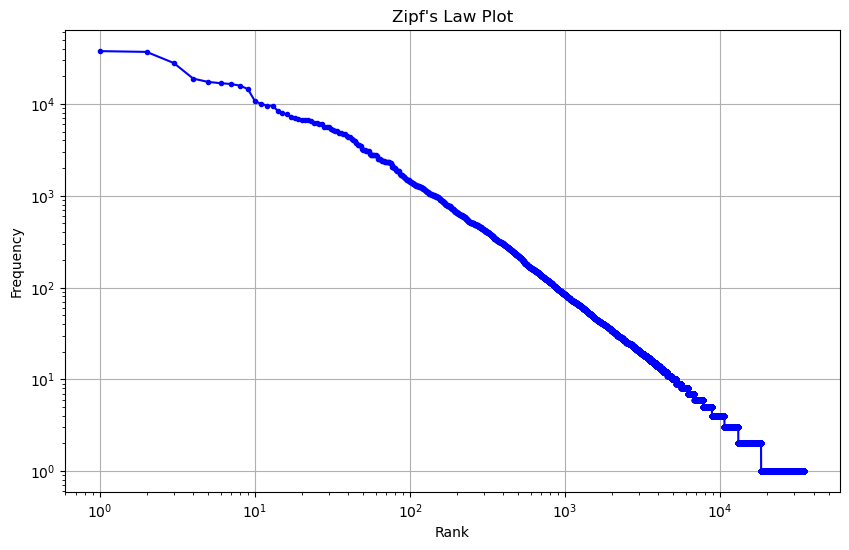

In [98]:
plot_zipfs_law(ranks, frequencies, word_list)